# <center> Prediccion de Precios en Bienes Raices - Mercado Australiano - Regresion Avanzada

# Tabla de Contenido

1. [Introduccion](#Introduccion)
2. [Configuracion e Instalacion](#Configuracion-e-Instalacion)
3. [Entendimiento de los Datos](#Entendimiento-de-los-Datos)  
4. [Manipulacion y Limpieza de Datos](#Manipulacion-y-Limpieza-de-Datos)
    1. [Dropping Data](#Dropping-Data)
    2. [Derived Data](#Derived-Data)
5. [Analisis de Datos](#Analisis-de-Datos)
    1. [Analisis-Univariable](#Analisis-Univariable)
        1. [Plot Numeric Data](#Plot-Numeric-Data)
        2. [Plot Categorical Data](#Plot-Categorical-Data)
    2. [Analisis-Bivariable](#Analisis-Bivariable)
6. [Preparacion de Datos y Modelado](#Preparacion-de-Datos-y-Modelado)
    1. [Splitting data into Train Test](#Splitting-data-into-Train-Test)
7. [Construccion-del-Modelo](#Model-Building)
    1. [Ridge Regression](#Ridge-Regression)
    2. [Lasso Regression](#Lasso-Regression)
8. [Conclusions y Observaciones](#Conclusiones-y-Observaciones)

# Introduccion 

### Integrates de Grupo:
* CALEB JEZER ENRRIQUEZ GUZMAN caleb.enrriquez@gmail.com
* CARLOS FERNANDO MARCA CHOQUE carlosfernandomarcachoque@gmail.com
*   ROBERTO NELSEN CHAMBI robertonelsencr@gmail.com





...

## Entendimiento del Negocio

Una empresa de vivienda con sede en EE. UU. llamada Surprise Housing ha decidido ingresar al mercado australiano. La empresa utiliza el análisis de datos para comprar casas a un precio inferior a sus valores reales y venderlas a un precio más alto. Con el mismo propósito, la empresa ha recopilado un conjunto de datos de la venta de casas en Australia. Los datos se proporcionan en el archivo CSV a continuación.

La compañía está buscando posibles propiedades para comprar e ingresar al mercado. Debe construir un modelo de regresión utilizando la regularización para predecir el valor real de las posibles propiedades y decidir si invertir en ellas o no.

La empresa quiere saber:

* Qué variables son significativas para predecir el precio de una casa, y
* Qué tan bien esas variables describen el precio de una casa.

Además, determine el valor óptimo de lambda para la regresión de Ridge y Lasso.
 
### Objetivo del Negocio:

Debe modelar el precio de las casas con las variables independientes disponibles. Luego, la gerencia utilizará este modelo para comprender cómo varían exactamente los precios con las variables. En consecuencia, pueden manipular la estrategia de la empresa y concentrarse en áreas que generarán altos rendimientos. Además, el modelo será una buena manera para que la gerencia entienda la dinámica de precios de un nuevo mercado.

# Configuracion e Instalacion

In [258]:
# Importar Librerias Requeridas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab 
import seaborn as sns
import sys
import copy

# Importar Librerias de Machine Learning
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold,cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Importar Librerias de Estadistica
import statsmodels.api as stats
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

# Ignorar Alertas (Warnings)
import warnings
warnings.filterwarnings('ignore')

# Definir precision del FLOAT a dos digitos.
pd.options.display.float_format = '{:.2f}'.format 

In [4]:
# Leer el DATASET CSV con en un Dataframe.

# Direccion relativa del Dataset
DATA_FILE_PATH = '/content/dataset.csv'

raw_data = pd.read_csv(DATA_FILE_PATH)
df = raw_data

# Entendimiento de los Datos

In [5]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.00,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.00,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.00,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.00,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
print(df.shape)
 
print(df.columns)

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.00,730.50,421.61,1.00,365.75,730.50,1095.25,1460.00
MSSubClass,1460.00,56.90,42.30,20.00,20.00,50.00,70.00,190.00
LotFrontage,1201.00,70.05,24.28,21.00,59.00,69.00,80.00,313.00
LotArea,1460.00,10516.83,9981.26,1300.00,7553.50,9478.50,11601.50,215245.00
OverallQual,1460.00,6.10,1.38,1.00,5.00,6.00,7.00,10.00
OverallCond,1460.00,5.58,1.11,1.00,5.00,5.00,6.00,9.00
YearBuilt,1460.00,1971.27,30.20,1872.00,1954.00,1973.00,2000.00,2010.00
YearRemodAdd,1460.00,1984.87,20.65,1950.00,1967.00,1994.00,2004.00,2010.00
MasVnrArea,1452.00,103.69,181.07,0.00,0.00,0.00,166.00,1600.00
BsmtFinSF1,1460.00,443.64,456.10,0.00,0.00,383.50,712.25,5644.00


#MANIPULACION Y LIMPIEZA DE LOS DATOS

##DROPPING AND DERIVED DATA

In [8]:
#Eliminamos la columna id
df.drop(columns=['Id'],axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

DE TODO NUESTRO CONJUNTO DE DATOS TENEMOS

FLOAT: 3

INT64: 35

OBJECT(VALORES CATEGORICOS):43

In [10]:
#Buscamos valores Nulos
df.isna().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
Fireplaces         0
Functional         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

Existen 3 columnas que son valores Numericos por lo cual procedemos a rellenar esos valores nulos
se puede rellenar con valor 0 o la media o mediana de dicha columna

In [11]:
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)



In [12]:
#Revisamos que se eliminaron los valores nulos y procedemos con los categoricos
df.isna().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageFinish      81
GarageQual        81
GarageCond        81
GarageType        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrType         8
Electrical         1
BsmtFullBath       0
Fireplaces         0
Functional         0
HalfBath           0
FullBath           0
TotRmsAbvGrd       0
BsmtHalfBath       0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

PROCEDEMOS A ELIMINAR LAS COLUMNAS QUE TENGAS MAS DEL 80% DE VALORES NULOS

In [13]:
df.drop(columns=['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [14]:
#Revisamos que se eliminaron los valores nulos y procedemos con los categoricos
df.isna().sum().sort_values(ascending=False).head(25)

FireplaceQu      690
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
Electrical         1
WoodDeckSF         0
KitchenAbvGr       0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
SaleCondition      0
BedroomAbvGr       0
SaleType           0
YrSold             0
MoSold             0
dtype: int64

DE LAS 1460 FILAS "FIREPLACEQU" TIENE 690 VALORES NULOS POR LO CUAL ANALIZAREMOS SI SE PUEDE COMPLETAR CON UN VALOR RELEVANTE

In [15]:
#REVISAMO QUE VALORES CONTIENE LA COLUMNA FIREPLACEQU
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [16]:
#"FIREPLACEQU" TIENE LA COLUMNA "FIREPLACES" QUE SI LA CASA CONTIENE CHIMENEA O NO POR LO CUAL COMPARAREMOS ESTAS 2 COLUMNAS
df[df['FireplaceQu'].isnull()][['Fireplaces','FireplaceQu']]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
...,...,...
1452,0,NaN
1453,0,NaN
1454,0,NaN
1458,0,NaN


EN LA COLUMNA FIREPLACEQU EXISTEN 690 VALORES NAN, ESTO ES QUE FIREPLACES CONTIENE VALOR 0 O EN OTRAS PALABRAS 690 CASAS NO CUENTAN CON CHIMENEA Y POR LO CUAL NO EXISTE CALIDAD DE LAS CHIMENEAS

In [17]:
#DEFINIMOS LOS VALORES CATEGORICOS QUE CONTIENEN VALORES NULOS 
df_cat =['FireplaceQu','GarageFinish','GarageQual','GarageCond','GarageType','BsmtExposure',
'BsmtQual','BsmtFinType1','BsmtFinType2','BsmtCond','MasVnrType','Electrical']

In [18]:
#REMPLAZAMOS LOS VALORES NULOS CON EL PARAMETRO "NONE"
for col in df_cat:
    df[col].fillna('None',inplace=True)


In [19]:
df.isna().sum().sort_values(ascending=False).head(25)

MSSubClass       0
HalfBath         0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
FullBath         0
MSZoning         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
SaleCondition    0
SaleType         0
YrSold           0
dtype: int64

YA NO CONTAMOS CON VALORES NULOS POR LO CUAL PROCEDEMOS A REALIZAR EN ANALISIS DE LOS DATOS

#ANALISIS DE LOS DATOS


##ANALISIS UNIVARIABLE

### Numerical Plot

In [20]:
col_num = df.select_dtypes(include=[np.int64]).columns
col_num

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [21]:
df_num = df[col_num]
df_num

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


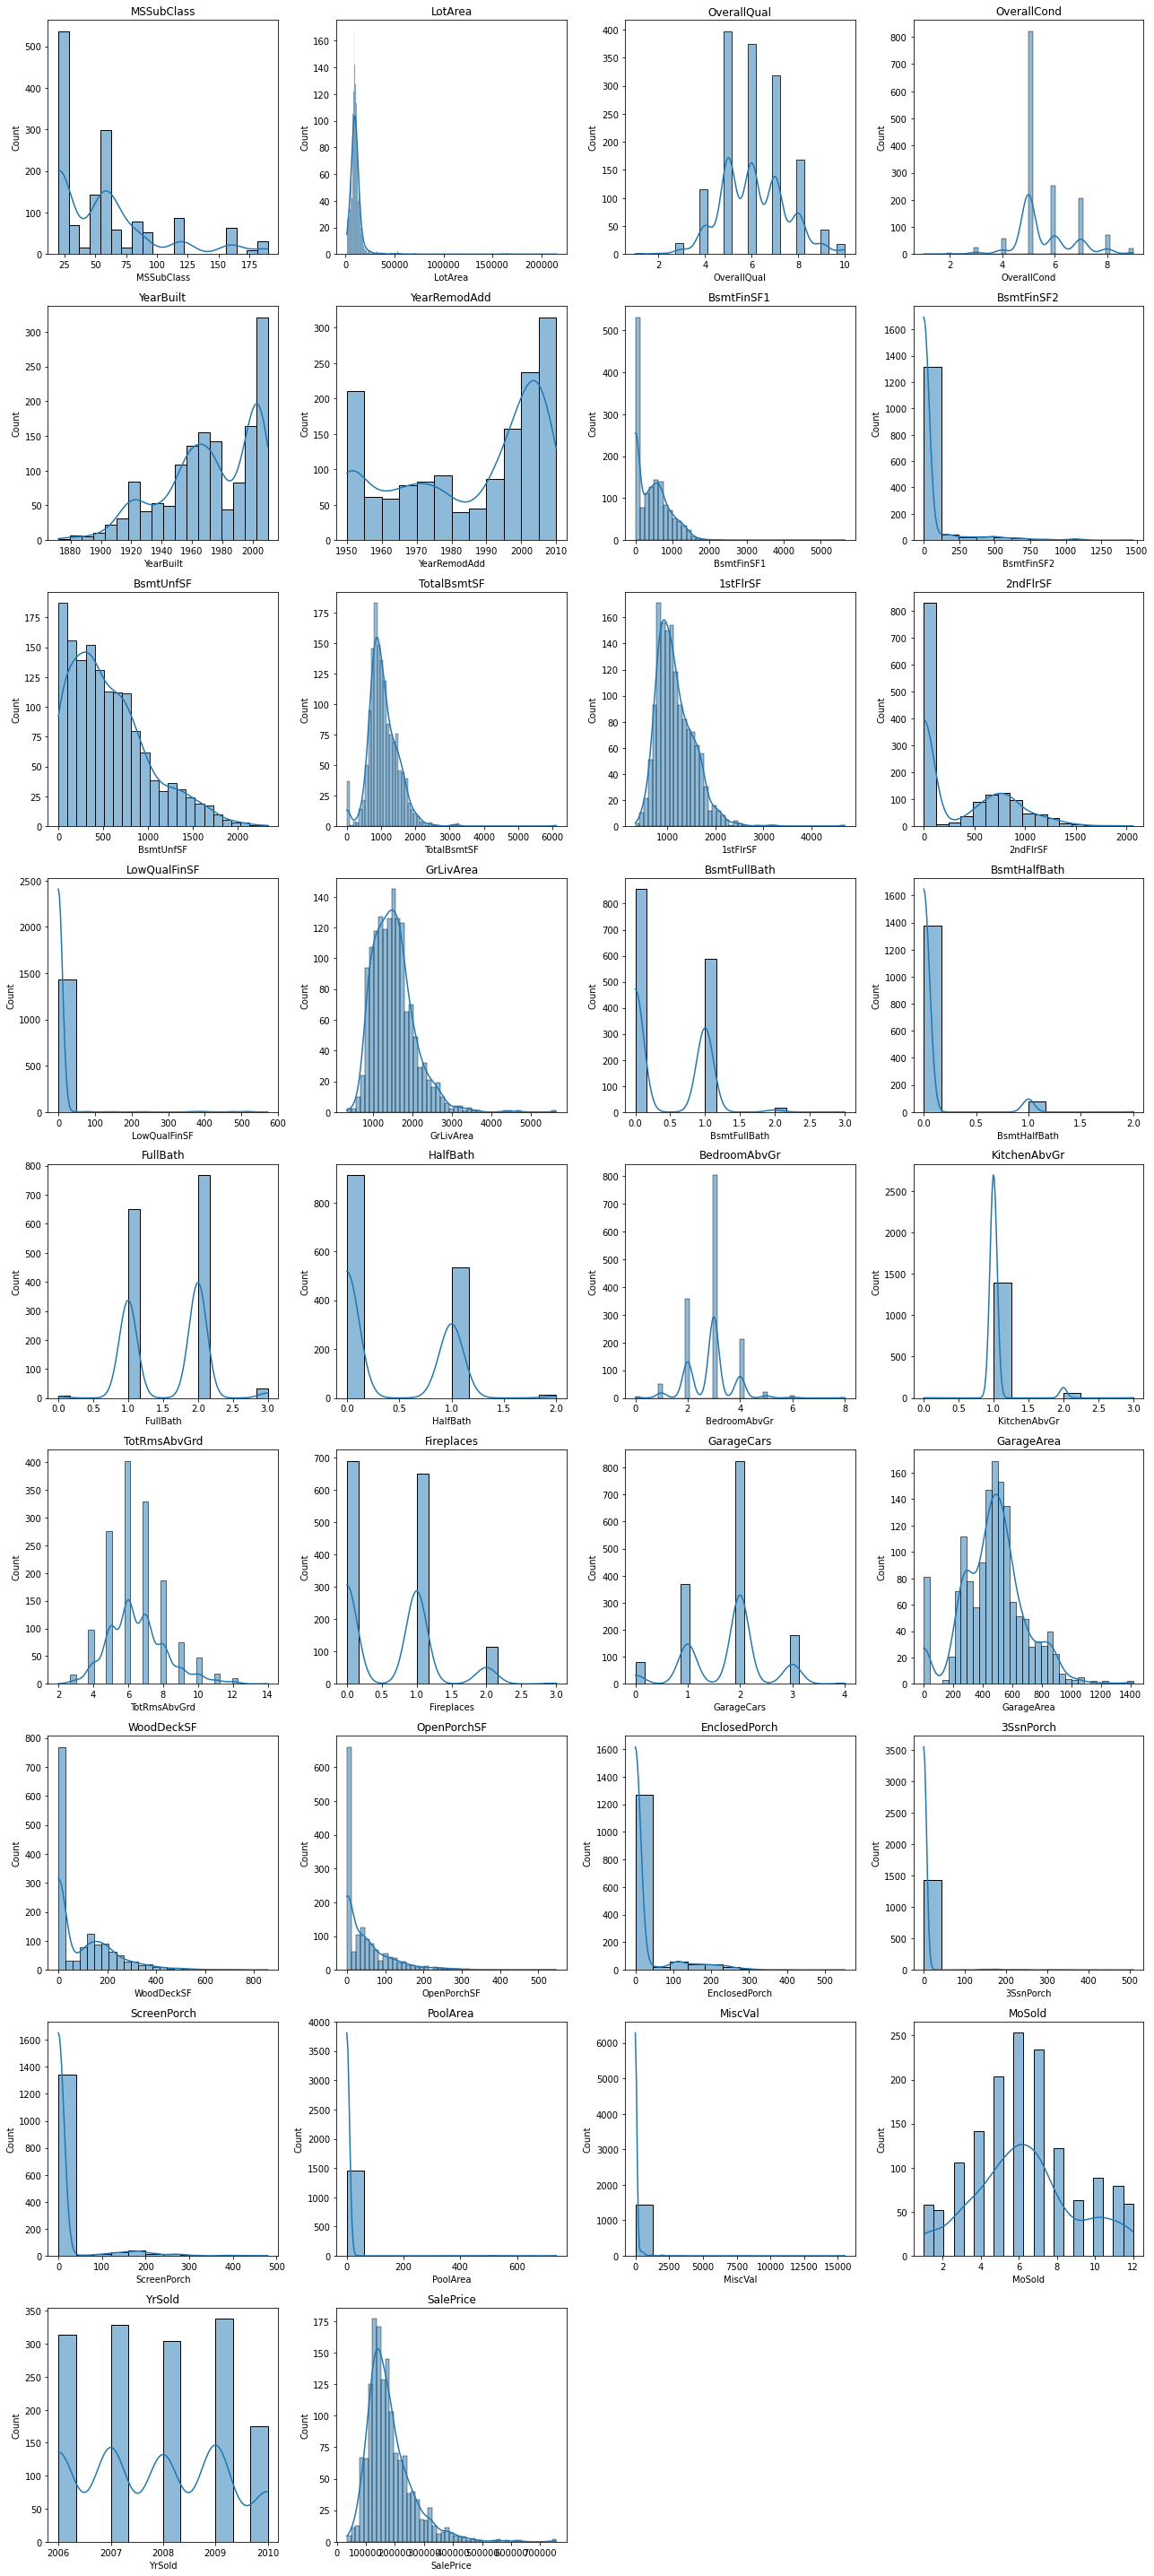

In [75]:
#creamos histogramas para cada uno de las variables numerica
plt.figure(figsize=(18,40))
i = 1

for col in df_num.columns:
    plt.subplot(9,4,i)
    sns.histplot(df_num[col], kde=True)
    plt.title(col)
    i += 1


plt.tight_layout()
plt.show()

LotArea,BsmtUnSF,TotalBsmtSF,1stFirSF,GRLivArea,GarageArea: tiene un distribuciona Normal hacia la derecha haciendo que contengan posibles Outliers que generen un sesgo al modelo

Esto lo comprobaremos con el grafico boxplot

Las demas variables tienen un distribucion atipica o sin un orden aparente

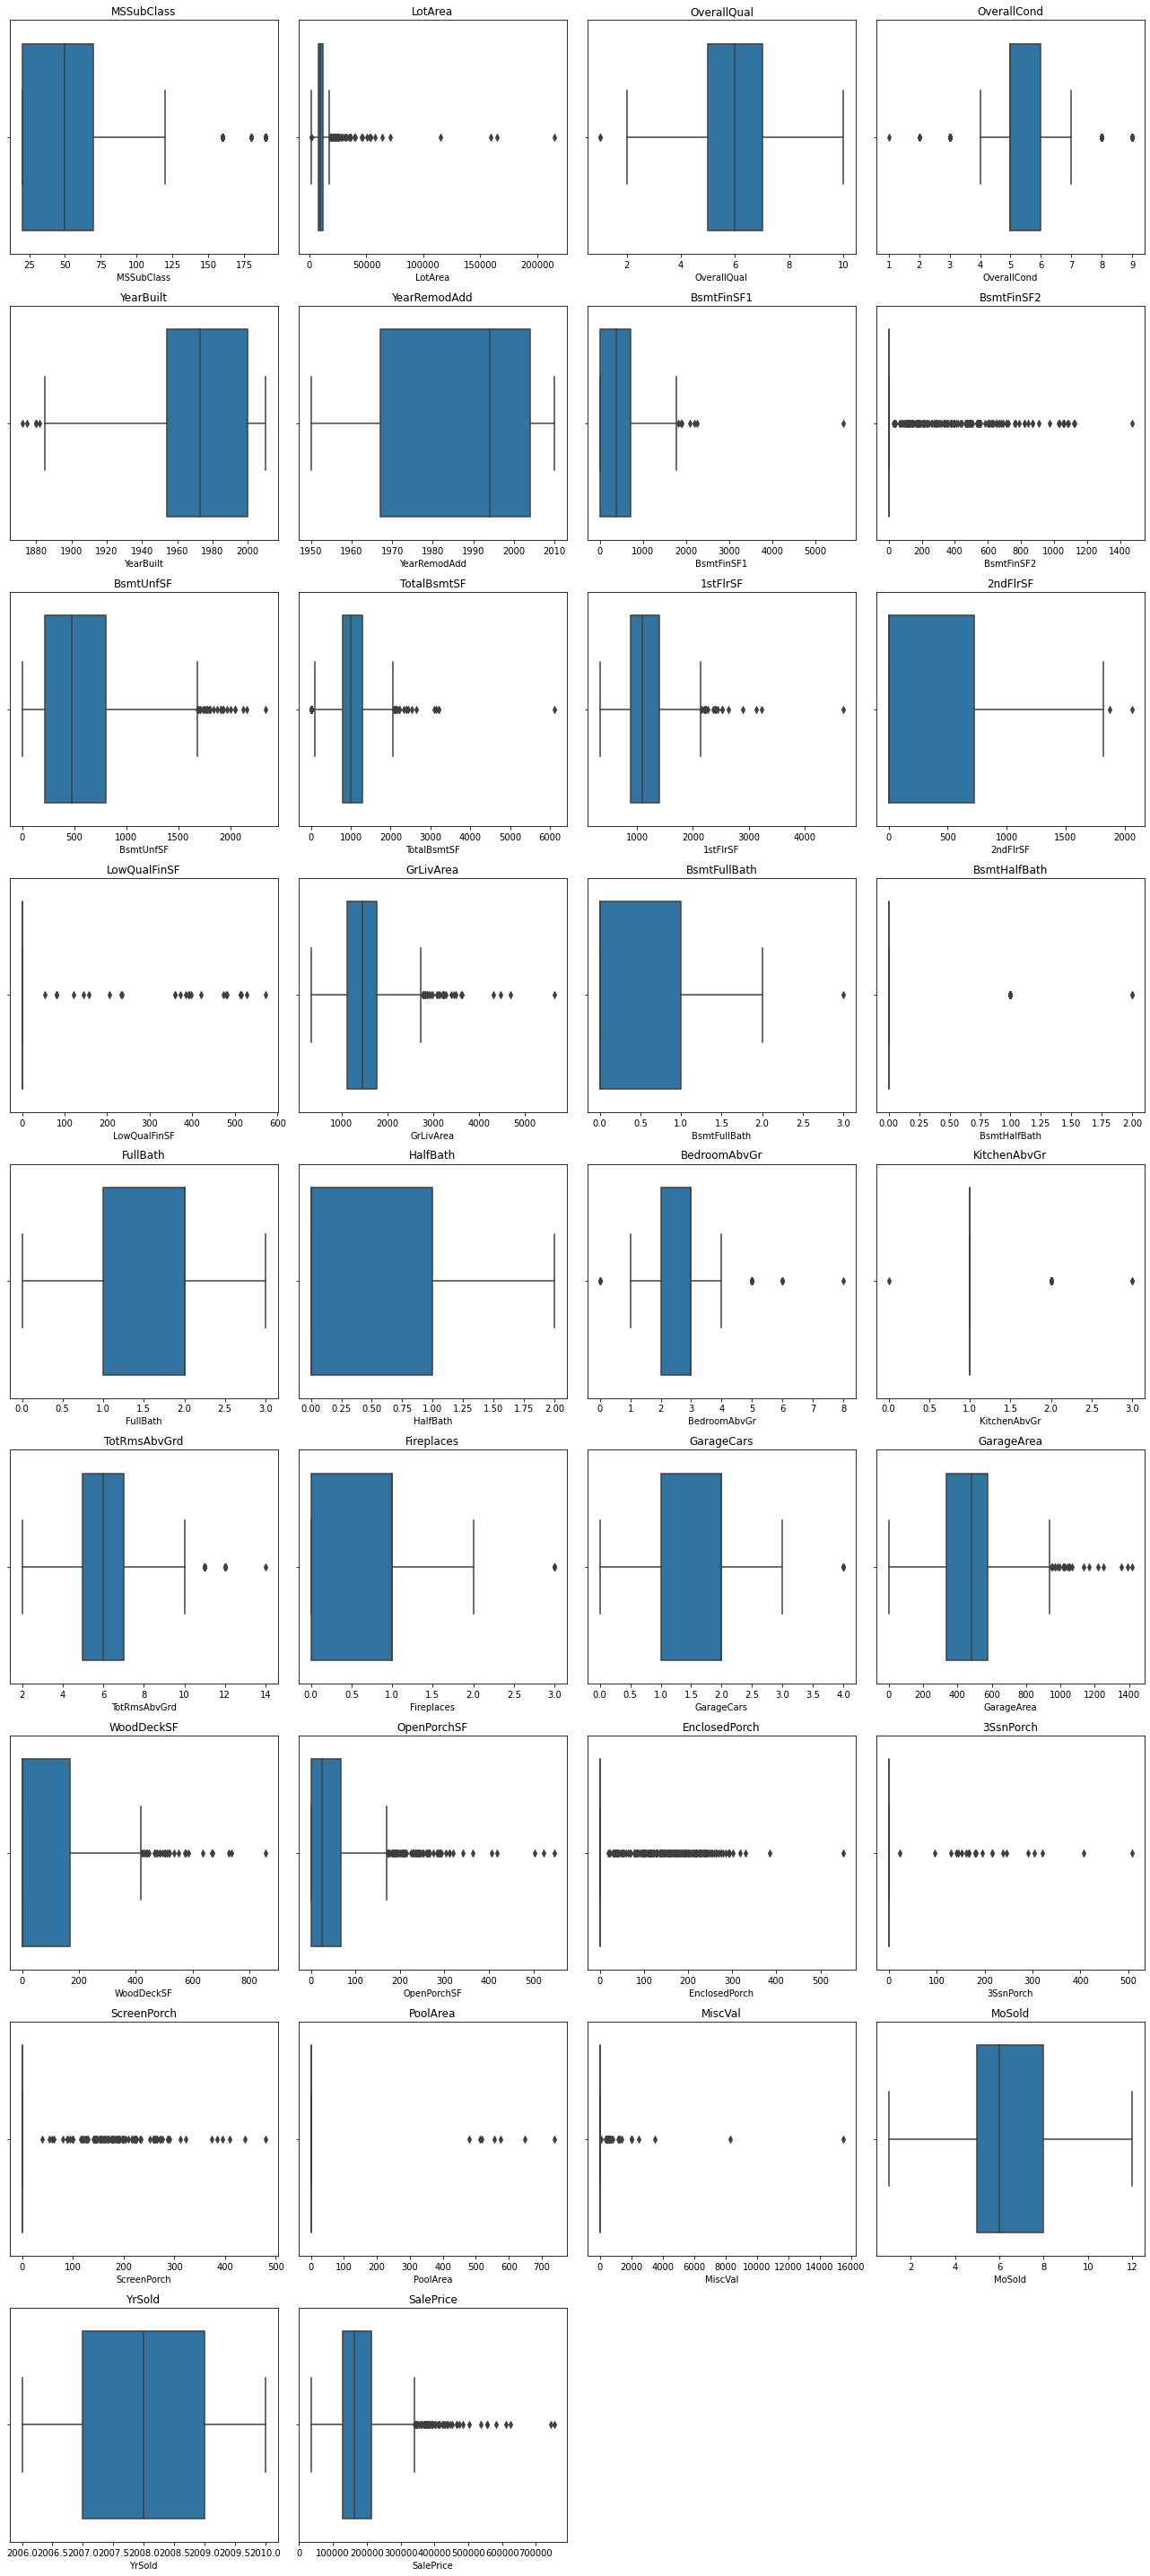

In [74]:
#creamos boxplot para cada uno de las variables numerica
plt.figure(figsize=(18,40))
i = 1

for col in df_num.columns:
    plt.subplot(9,4,i)
    sns.boxplot(df_num[col])
    plt.title(col)
    i += 1


plt.tight_layout()
plt.show()

LotArea tiene demasiados outliers  que esto pueden generar un sesgo al modelo

GrLivArea contiene outliers pero pueden ser considerados dentro del rango para ser tomados en cuenta

SalePrice la variable objetivo contiene outliers esto puede ser normalizada para entrenar al modelo

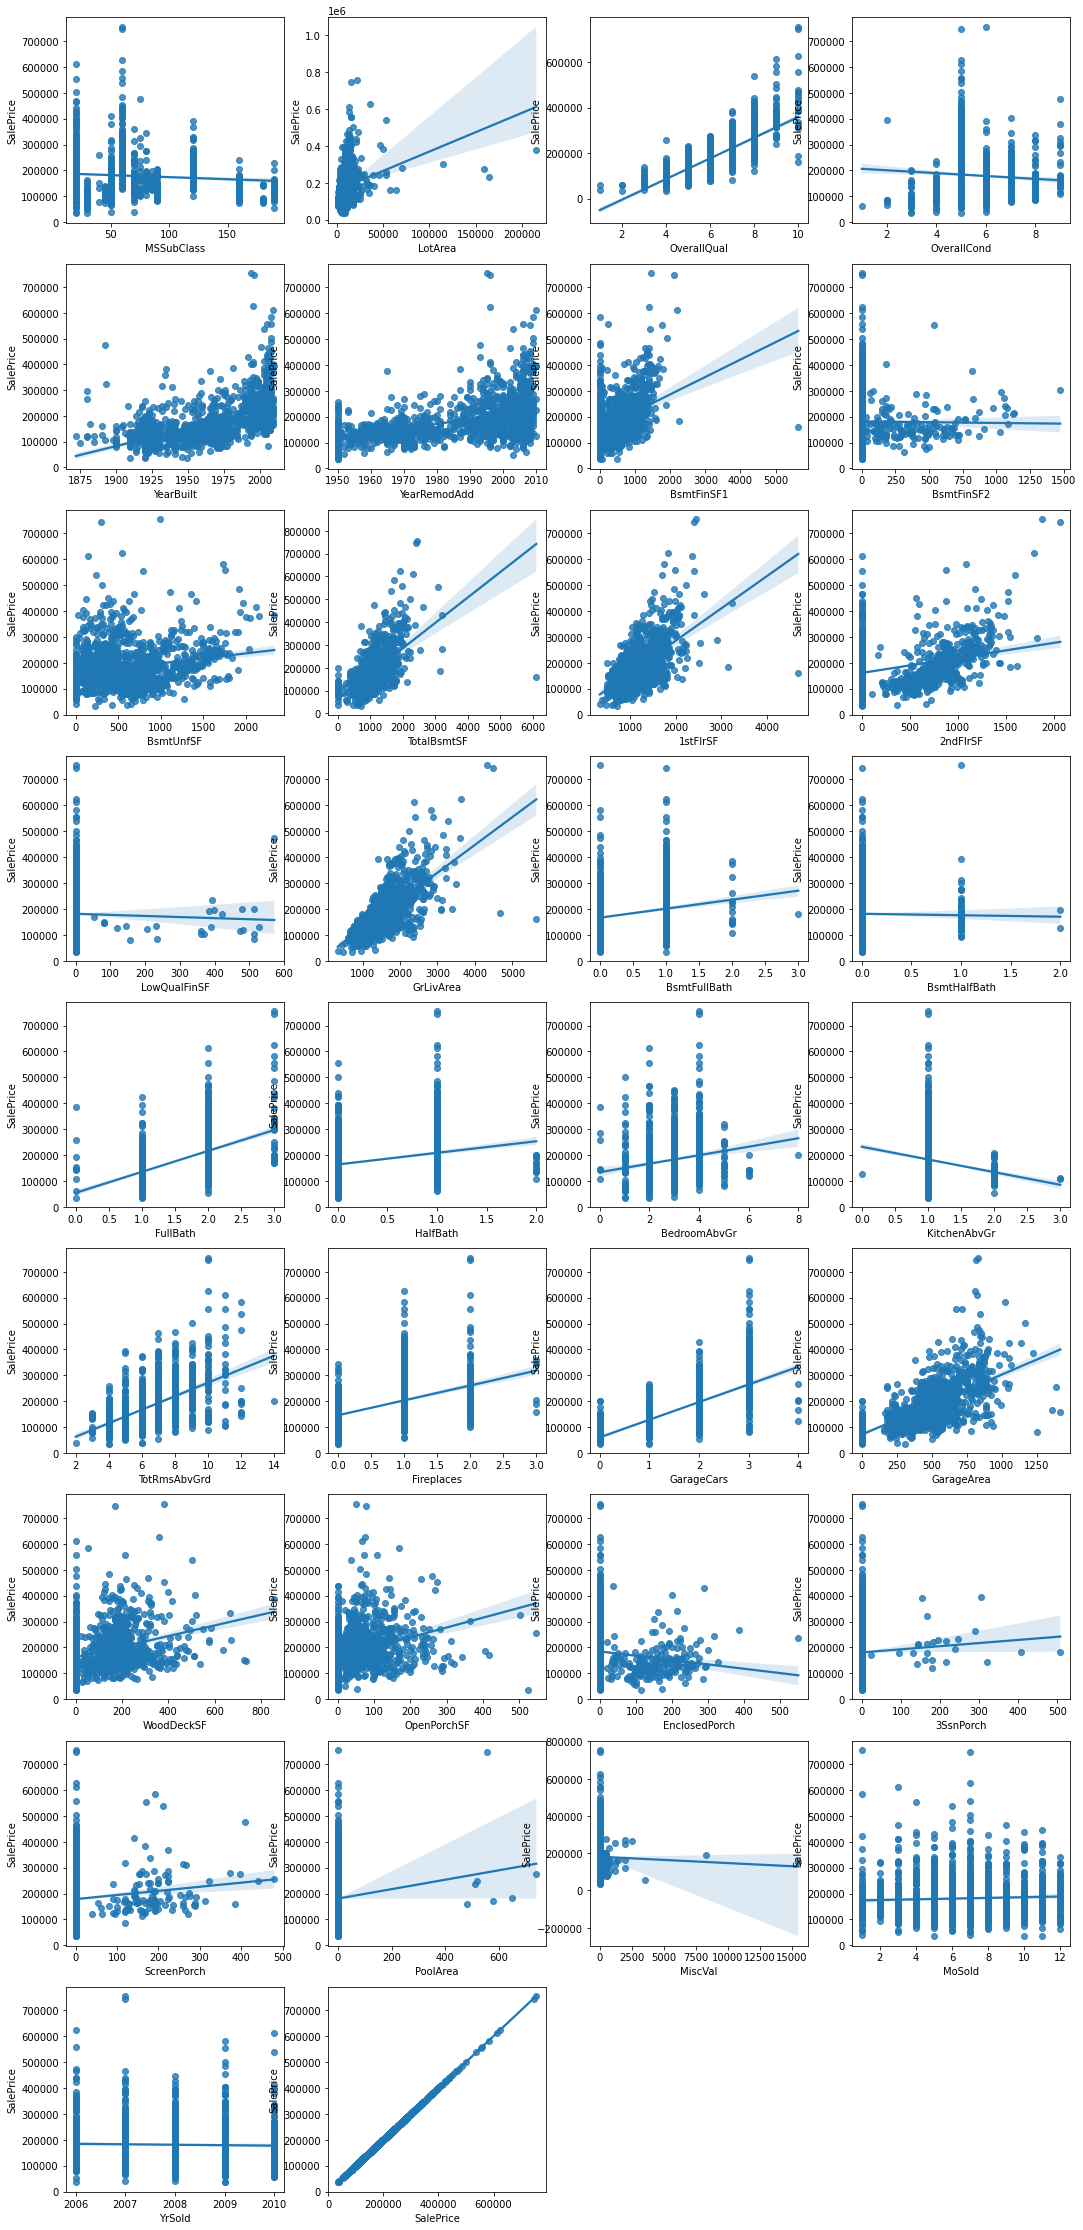

In [82]:
#creamos un grafico que muestre la relacion  entre SalePrice con las demas  Variables
count=1
plt.subplots(figsize=(18, 40))
for i in df_num.columns:
    plt.subplot(9,4,count)
    sns.regplot(df_num[i],df_num['SalePrice'])
    count+=1

plt.show()

Este grafico muestra alguna variables que tienen una relacion lineal con SalePrice como ser elmas evidente el GRLivArea,1stFlrSF,TotalBsmtSF,GarageArea
en su mayoria varibles que pudimos ver atraves del histograma que contienen una distribucion normal por asi llamarlo

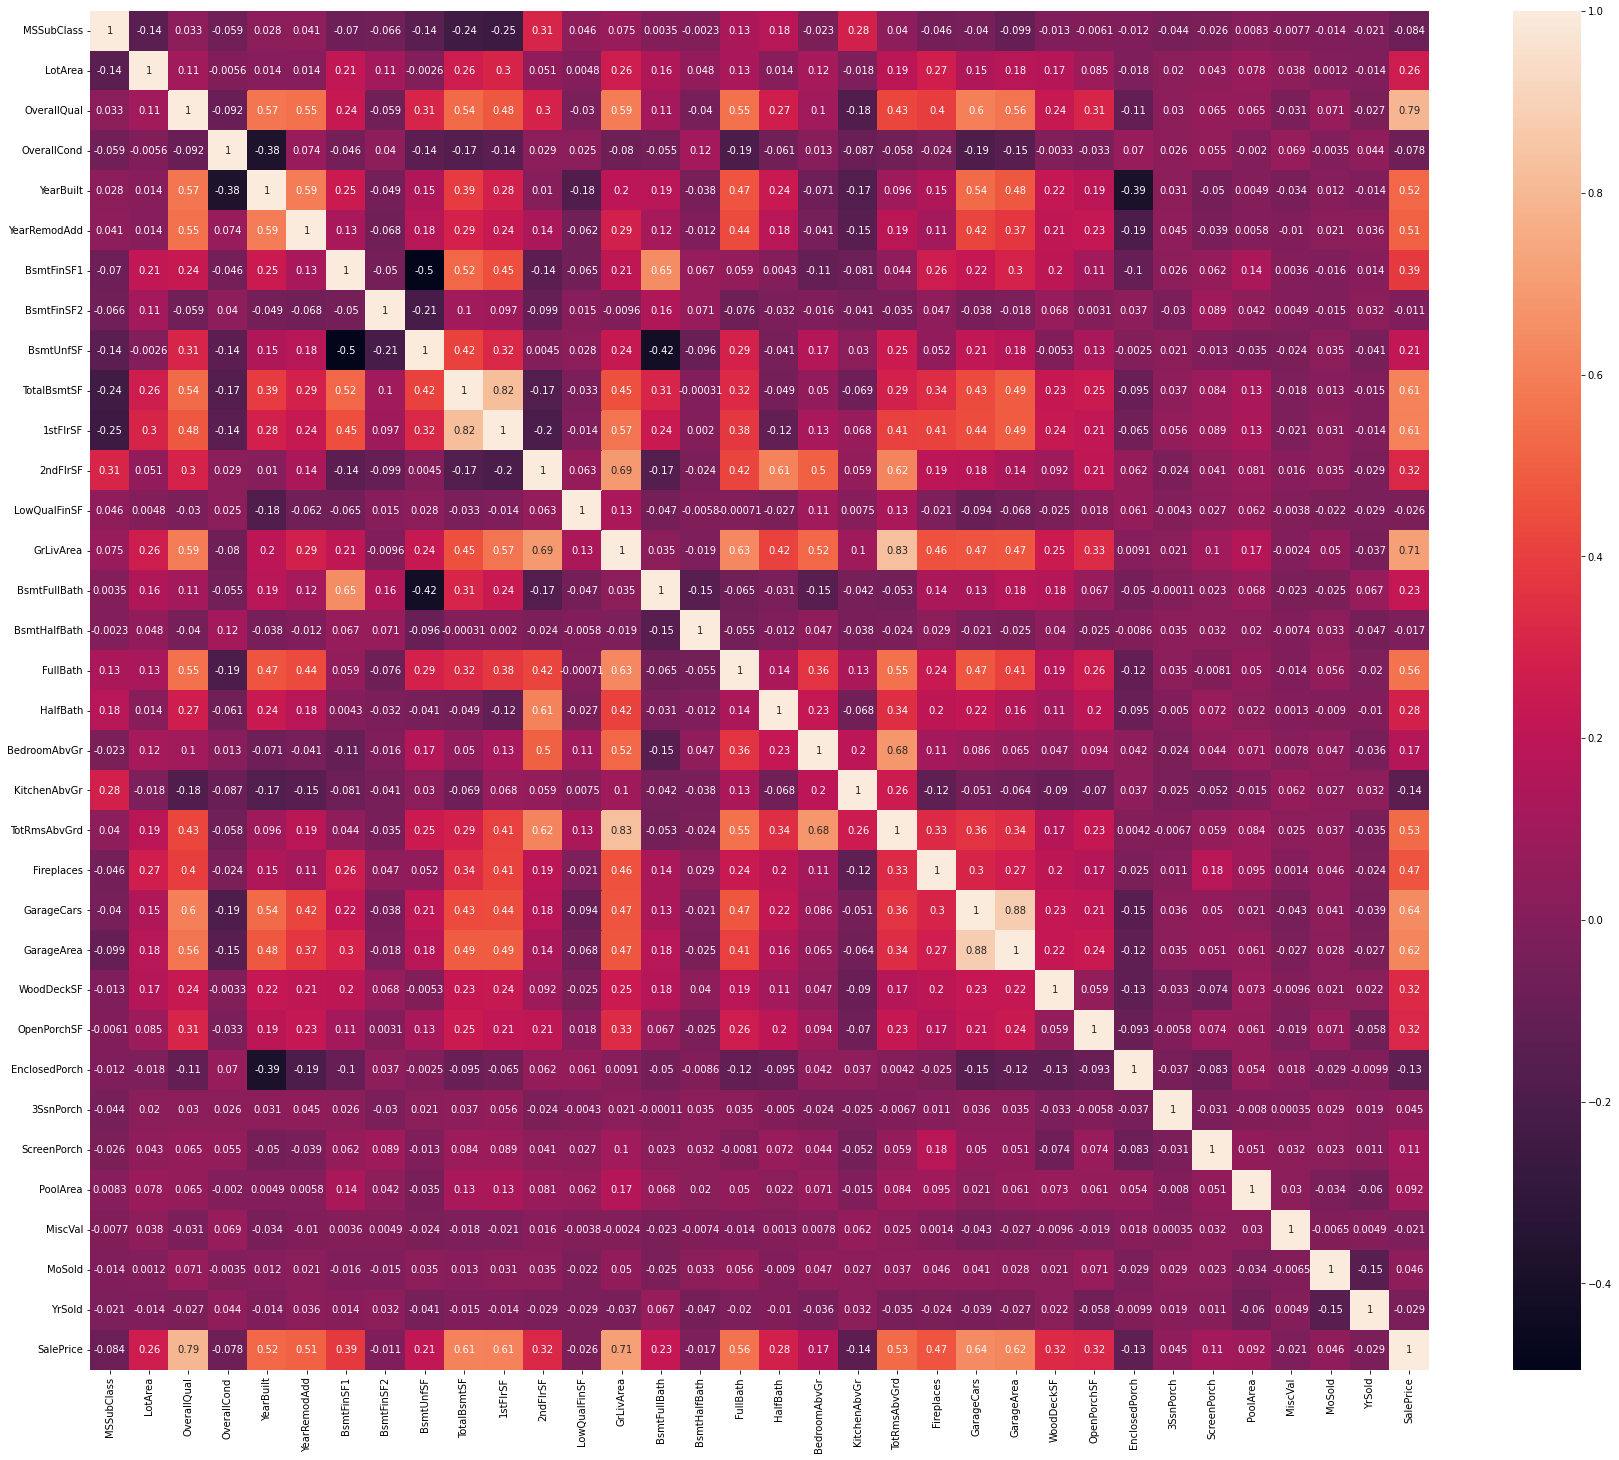

In [88]:
#correlacion de variables numericas
plt.figure(figsize=(30, 25))
sns.heatmap(df_num.corr(method='pearson'),annot=True)
plt.show()

In [112]:
#SACAMOS EN ORDEN DESCENDENTE LAS VARIABLES QUE TIENEN MAS CORRELACION CON SALESPRICE
df_corr_num=df_num[:].corr().sort_values(['SalePrice'],ascending=False)
df_corr_num.SalePrice


SalePrice        1.00
OverallQual      0.79
GrLivArea        0.71
GarageCars       0.64
GarageArea       0.62
TotalBsmtSF      0.61
1stFlrSF         0.61
FullBath         0.56
TotRmsAbvGrd     0.53
YearBuilt        0.52
YearRemodAdd     0.51
Fireplaces       0.47
BsmtFinSF1       0.39
WoodDeckSF       0.32
2ndFlrSF         0.32
OpenPorchSF      0.32
HalfBath         0.28
LotArea          0.26
BsmtFullBath     0.23
BsmtUnfSF        0.21
BedroomAbvGr     0.17
ScreenPorch      0.11
PoolArea         0.09
MoSold           0.05
3SsnPorch        0.04
BsmtFinSF2      -0.01
BsmtHalfBath    -0.02
MiscVal         -0.02
LowQualFinSF    -0.03
YrSold          -0.03
OverallCond     -0.08
MSSubClass      -0.08
EnclosedPorch   -0.13
KitchenAbvGr    -0.14
Name: SalePrice, dtype: float64

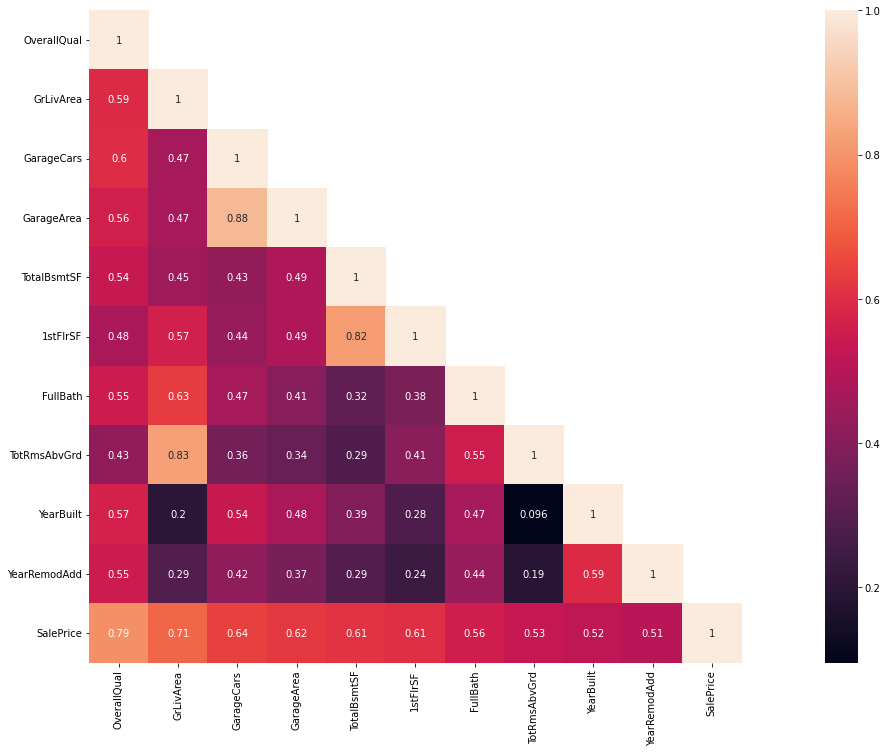

In [207]:
#separamos las columnas que tienen mas correlacion
cor_mat= df_num[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd',
             'YearBuilt','YearRemodAdd','SalePrice']].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

###Categorical Plot

In [189]:
#Extraemos las variables categoricas
var_cat = []

for col in df.columns:
    if df[col].dtype=='O':
        var_cat.append(col)

In [192]:

var_cat

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [191]:
#creamos un nuevo dataframe con las variables categoricas y anadimos la columna objetivo "SalePrice"
var_cat2 = copy.copy(var_cat)
var_cat2.append('SalePrice')
df_cat = df[var_cat2]
df_cat


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,175000
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal,210000
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,266500
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal,142125


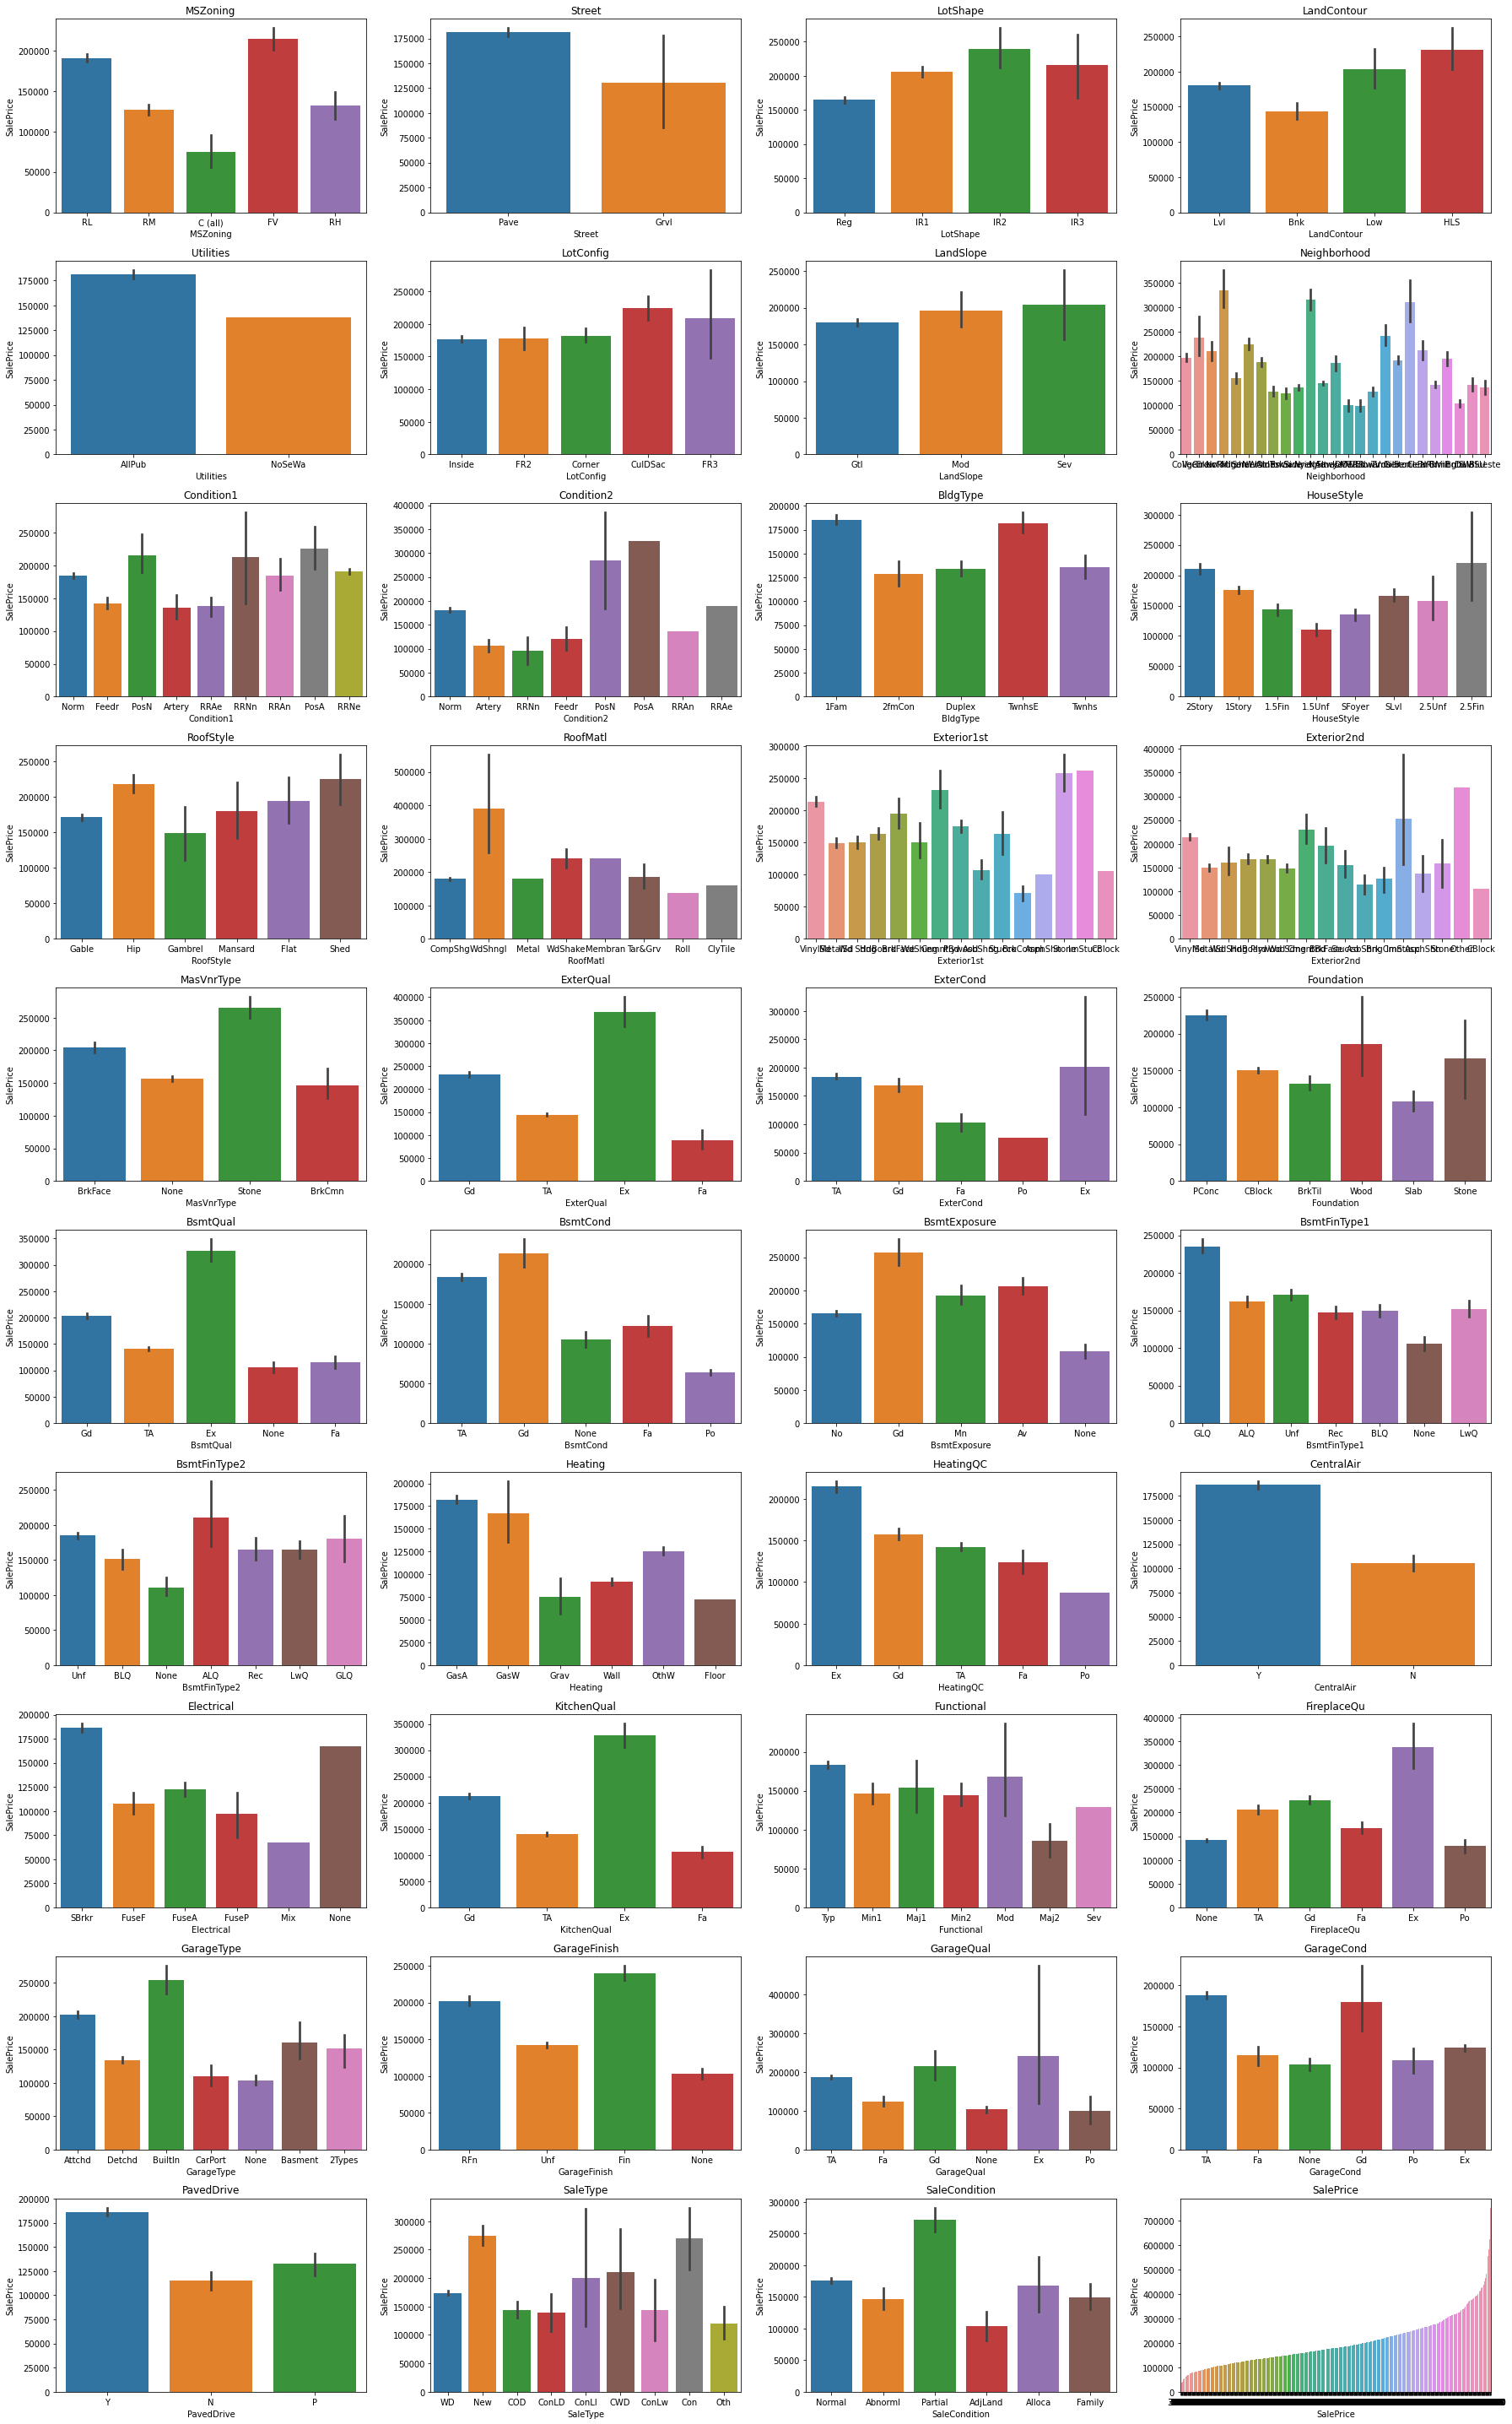

In [154]:
#creamos barplot para cada uno de las variables categoricas
plt.figure(figsize=(25,40))
i = 1

for col in df_cat.columns:
    plt.subplot(10,4,i)
    sns.barplot(df_cat[col],y=df_cat['SalePrice'])
    plt.title(col)
    i += 1


plt.tight_layout()
plt.show()

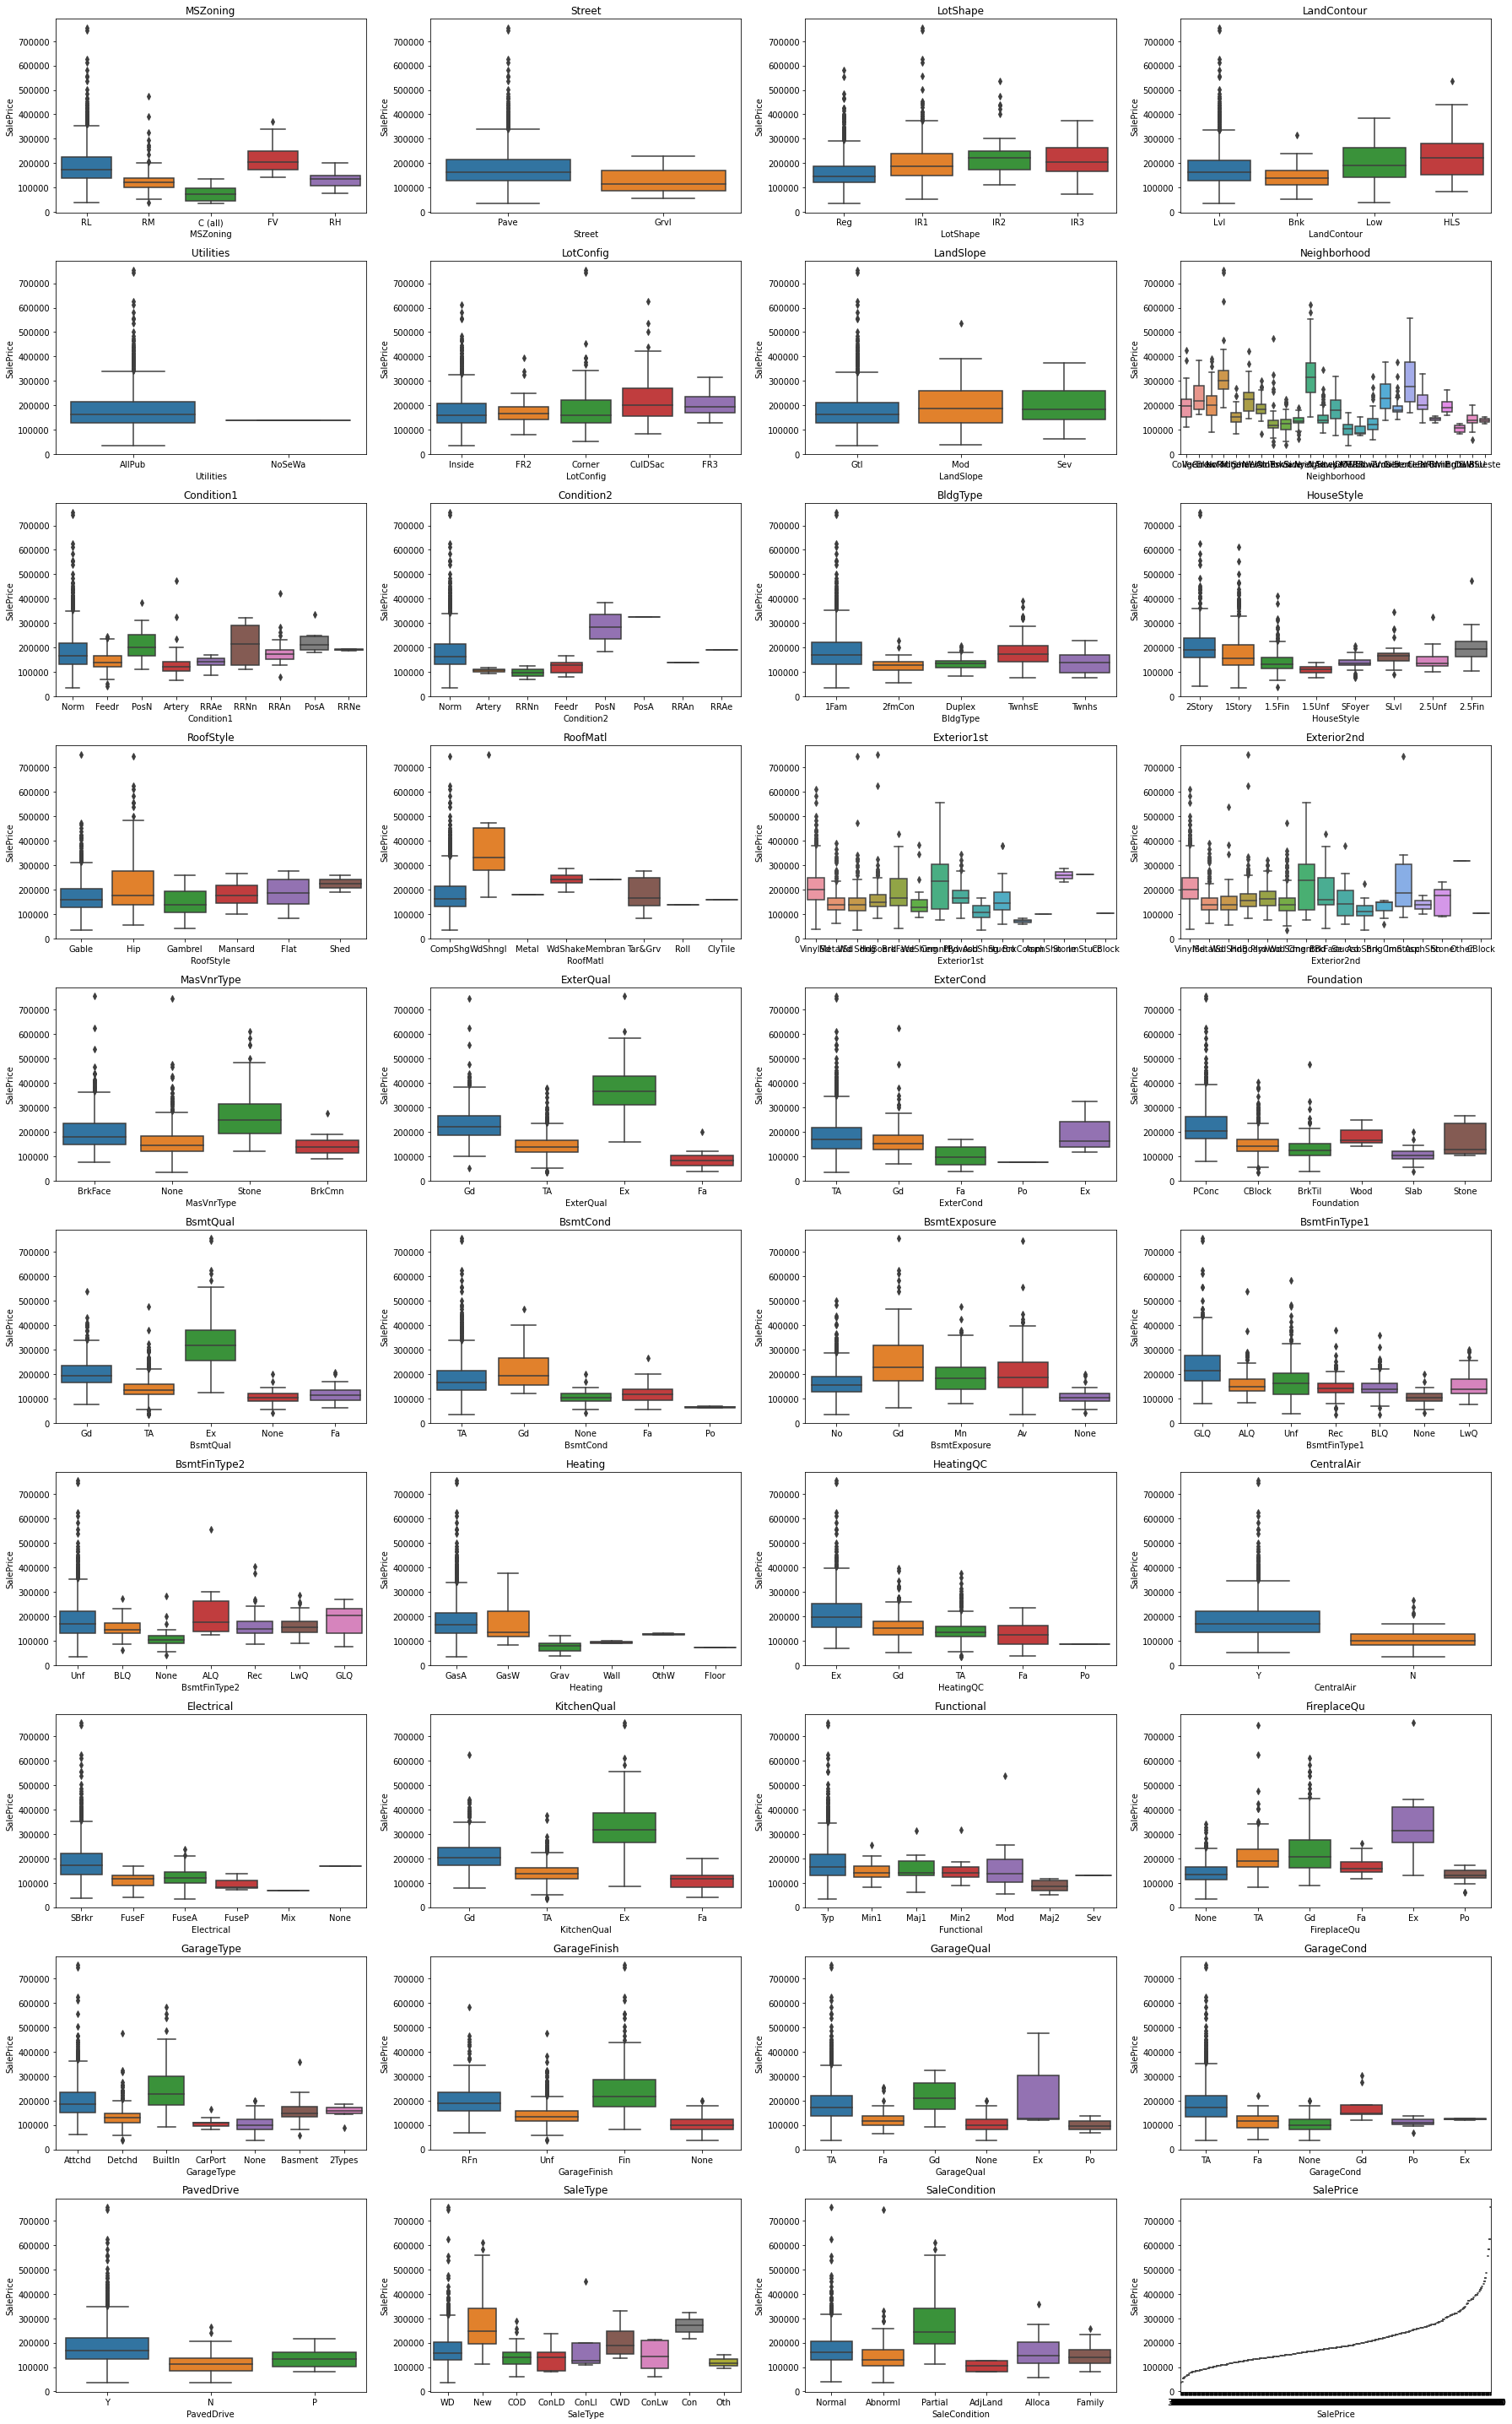

In [156]:
#creamos barplot para cada uno de las variables categoricas
plt.figure(figsize=(25,40))
i = 1

for col in df_cat.columns:
    plt.subplot(10,4,i)
    sns.boxplot(df_cat[col],y=df_cat['SalePrice'])
    plt.title(col)
    i += 1


plt.tight_layout()
plt.show()

El Barblot y Boxplot nos muestra la distribucion de sus distintas variables relacionadas a la variable objetivo y no podemos observar una correlacion directa y/o observable por lo cual convertiremos las variables categoricas a numericas usando labelencoder

#PREPARACION DE LOS DATOS Y MODELADO

In [194]:
#aplicamos label encoder de sklearn para poder ver si existe correlacion con SalePrice
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

label_encoders = {}
for column in df_cat[var_cat]:
    label_encoders[column] = LabelEncoder()
    df_cat[column] = label_encoders[column].fit_transform(df[column])

In [195]:
df_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,6,3,1,2,5,5,2,8,4,208500
1,3,1,3,3,0,2,0,24,1,2,...,6,5,1,2,5,5,2,8,4,181500
2,3,1,0,3,0,4,0,5,2,2,...,6,5,1,2,5,5,2,8,4,223500
3,3,1,0,3,0,0,0,6,2,2,...,6,2,5,3,5,5,2,8,0,140000
4,3,1,0,3,0,2,0,15,2,2,...,6,5,1,2,5,5,2,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,6,5,1,2,5,5,2,8,4,175000
1456,3,1,3,3,0,4,0,14,2,2,...,2,5,1,3,5,5,2,8,4,210000
1457,3,1,3,3,0,4,0,6,2,2,...,6,2,1,2,5,5,2,8,4,266500
1458,3,1,3,3,0,4,0,12,2,2,...,6,3,1,3,5,5,2,8,4,142125


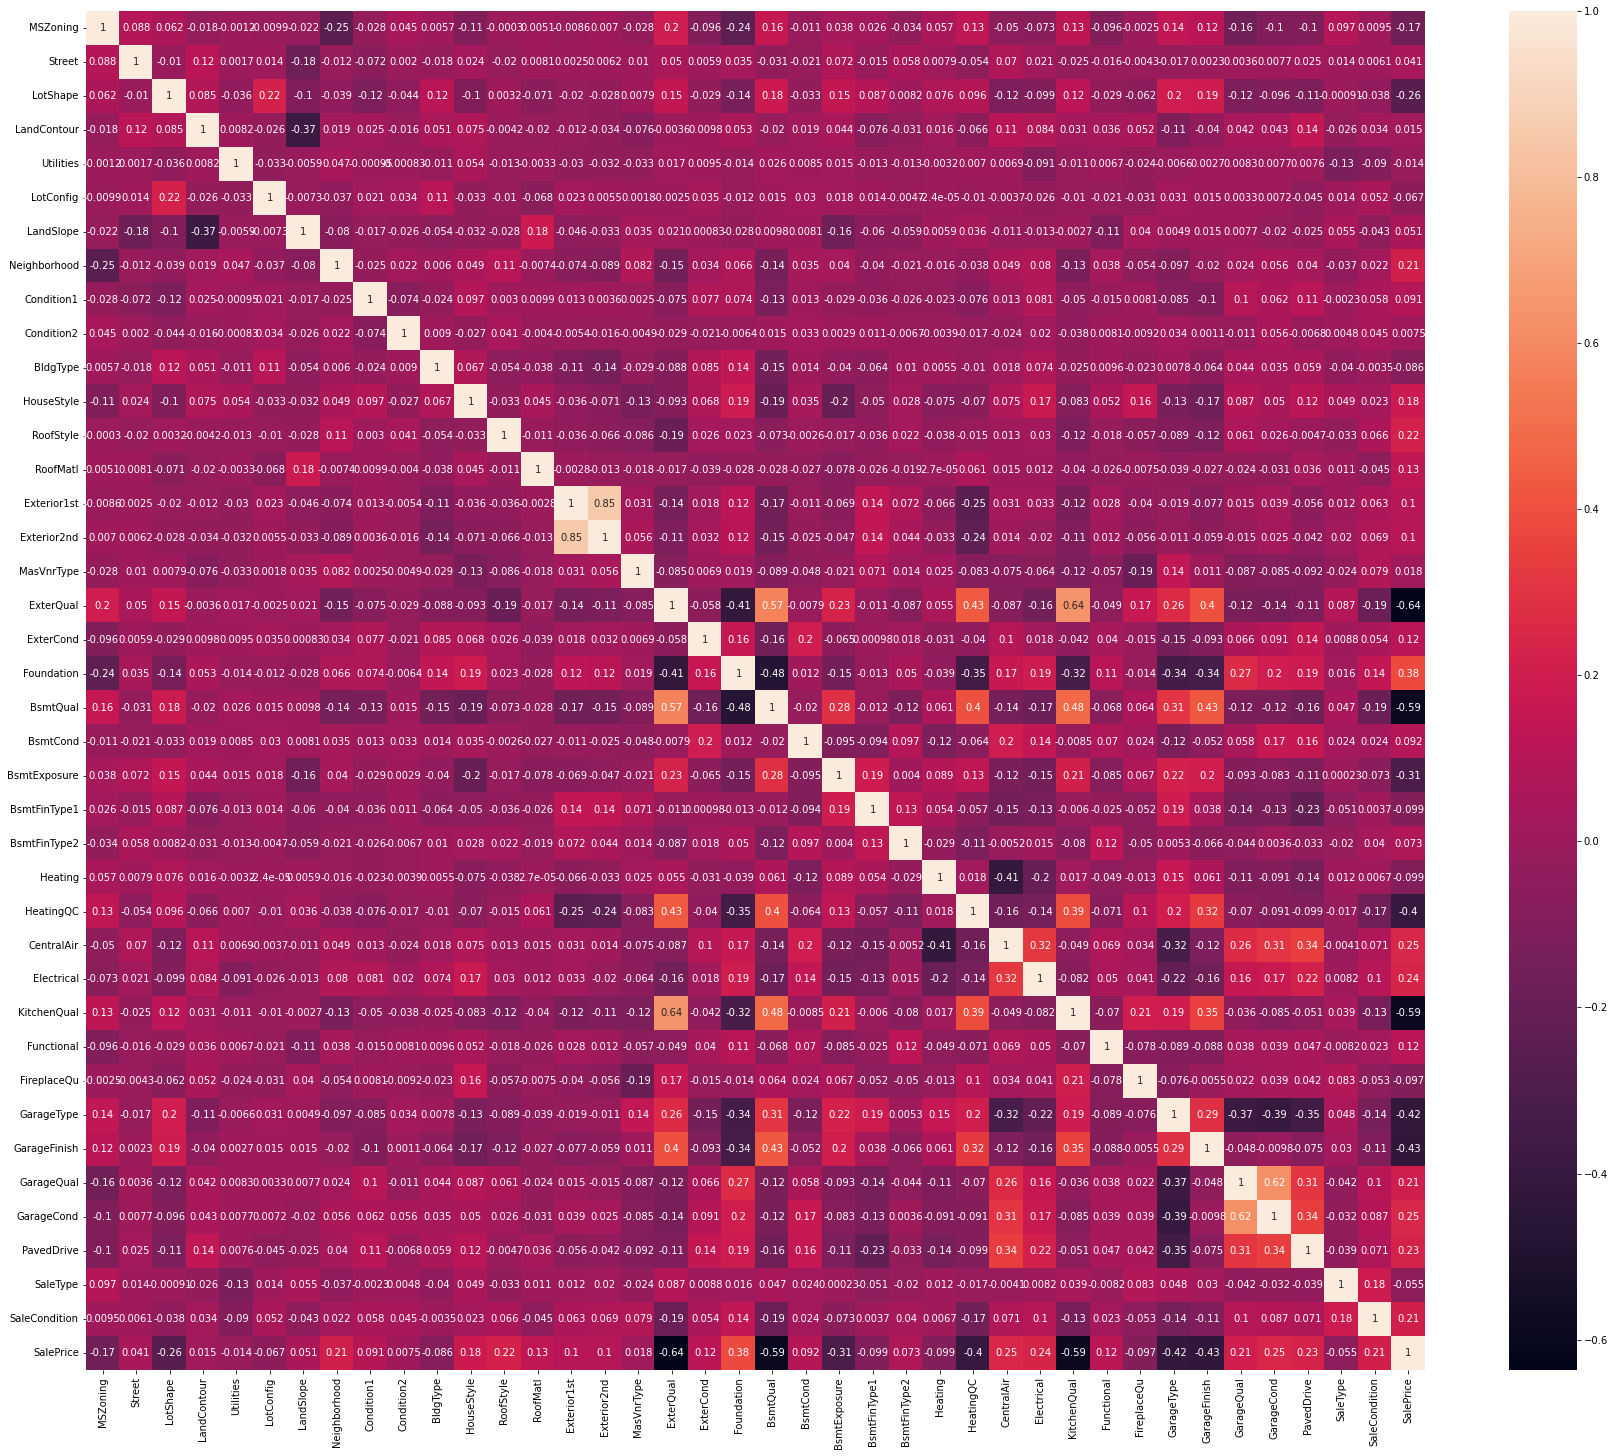

In [196]:
#correlacion de variables categoricas
plt.figure(figsize=(30, 25))
sns.heatmap(df_cat.corr(method='pearson'),annot=True)
plt.show()

In [197]:
#SACAMOS EN ORDEN DESCENDENTE LAS VARIABLES QUE TIENEN MAS CORRELACION CON SALESPRICE
df_corr_cat=df_cat[:].corr().sort_values(['SalePrice'],ascending=False)
df_corr_cat.SalePrice


SalePrice        1.00
Foundation       0.38
CentralAir       0.25
GarageCond       0.25
Electrical       0.24
PavedDrive       0.23
RoofStyle        0.22
SaleCondition    0.21
Neighborhood     0.21
GarageQual       0.21
HouseStyle       0.18
RoofMatl         0.13
ExterCond        0.12
Functional       0.12
Exterior2nd      0.10
Exterior1st      0.10
BsmtCond         0.09
Condition1       0.09
BsmtFinType2     0.07
LandSlope        0.05
Street           0.04
MasVnrType       0.02
LandContour      0.02
Condition2       0.01
Utilities       -0.01
SaleType        -0.05
LotConfig       -0.07
BldgType        -0.09
FireplaceQu     -0.10
BsmtFinType1    -0.10
Heating         -0.10
MSZoning        -0.17
LotShape        -0.26
BsmtExposure    -0.31
HeatingQC       -0.40
GarageType      -0.42
GarageFinish    -0.43
KitchenQual     -0.59
BsmtQual        -0.59
ExterQual       -0.64
Name: SalePrice, dtype: float64

TENEMOS UNA CORRELACION NEGATIVA DE ETERNALQUAL,BSMTQUAL,KITCHENQUAL POR LO CUAL LO TOMAREMOS EN CUENTA PARA EL MODELADO

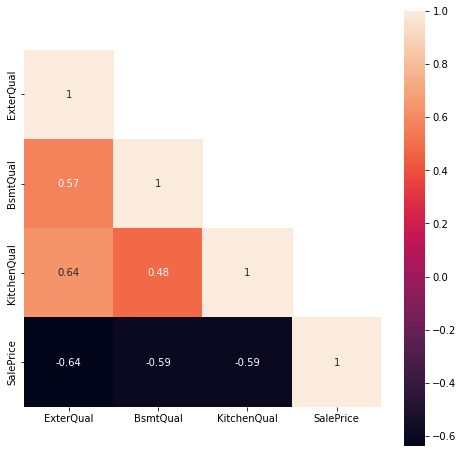

In [204]:
#separamos las columnas que tienen mas correlacion
cor_cat= df_cat[['ExterQual','BsmtQual','KitchenQual','SalePrice']].corr()
mask = np.array(cor_cat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(8,8)
sns.heatmap(data=cor_cat,mask=mask,square=True,annot=True,cbar=True)

In [216]:
#Unimos las variables en un Dataframe final para aplicar al modelo
df_cat = df_cat[['ExterQual','BsmtQual','KitchenQual']]
df_num = df_num[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd',
             'YearBuilt','YearRemodAdd','SalePrice']]
df_final = df = pd.concat([df_cat,df_num], axis=1)
df_final

,ExterQual,BsmtQual,KitchenQual,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,2,2,2,7,1710,2,548,856,856,2,8,2003,2003,208500
1,3,2,3,6,1262,2,460,1262,1262,2,6,1976,1976,181500
2,2,2,2,7,1786,2,608,920,920,2,6,2001,2002,223500
3,3,4,2,7,1717,3,642,756,961,1,7,1915,1970,140000
4,2,2,2,8,2198,3,836,1145,1145,2,9,2000,2000,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,2,3,6,1647,2,460,953,953,2,7,1999,2000,175000
1456,3,2,3,6,2073,2,500,1542,2073,2,7,1978,1988,210000
1457,0,4,2,7,2340,1,252,1152,1188,2,9,1941,2006,266500
1458,3,4,2,5,1078,1,240,1078,1078,1,5,1950,1996,142125


In [251]:
# Procedemos a separar las variables en X  y la variable objetivo en y
X = df_final[[x for x in df_final.columns if x != 'SalePrice']]
y = df_final['SalePrice']
# Get the shape of X and y
print(X.shape, y.shape)

(1460, 13) (1460,)


In [252]:
# Estandarisamos la variable predictoras
#La estandarización de los datos es un paso importante en el preprocesamiento de los datos 
std_scaler = StandardScaler().fit(X)
X_transform = std_scaler.transform(X)



In [255]:
#convertimos a un dataframe la variable predictora y la variable objetivo
X = pd.DataFrame(X_transform, columns=X.columns)
y = pd.DataFrame(y).reset_index().drop('index', axis=1)

In [256]:
#separamos los datos de entramiento en training y testing 
#20% de los datos iran para test y80% para train
#suffle= true indica que los datos deben mesclarse antes de ser divididos en test y train
#random_state aplicamos una semilla para replicar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,shuffle=True,random_state=123)

#Construccion del Modelo

##Regresion Lineal

In [262]:
#aplicamos el algoritmo de Regresion Lineal
rl_model = LinearRegression()
rl_model.fit(X_train, y_train)
y_preds_lin = rl_model.predict(X_test)
r2 = r2_score(y_test, y_preds_lin)
print(f'Coeficiente de Determinacion R2:', r2)

Coeficiente de Determinacion R2: 0.8173530431438002


In [265]:
#verificamos con cross_validation para evaluar la capacidad de un modelo para generalizar a nuevos datos
cros_r2 = cross_val_score(rl_model, X, y, scoring = 'r2')
print(f'Coeficiente de determinacion mediante cross validation: {np.mean(cros_r2)}')


Coeficiente de determinacion mediante cross validation: 0.7800122944346994


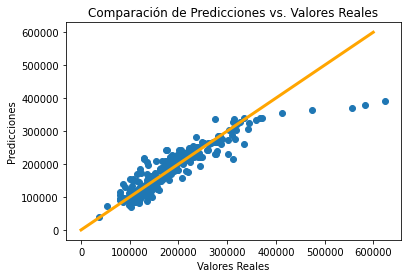

In [292]:
plt.scatter(y_test, y_preds_lin)
plt.plot([0, 600000], [0, 600000], "orange", lw=3)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación de Predicciones vs. Valores Reales")
plt.show()

##Lasso Regression

In [297]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)
y_preds_lass = lasso_model.predict(X_test)
r2 = r2_score(y_test, y_preds_lass)
print(f'Coeficiente de Determinacion R2:', r2)

Coeficiente de Determinacion R2: 0.8173513410865909


In [278]:
cross_lasso= cross_val_score(lasso_model, X, y, scoring = 'r2')
print(f'R_Squared using cross validation: {np.mean(cross_lasso)}')

R_Squared using cross validation: 0.7800125217560986


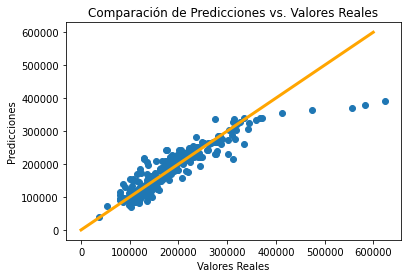

In [291]:
plt.scatter(y_test, y_preds_lass)
plt.plot([0, 600000], [0, 600000], "orange", lw=3)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación de Predicciones vs. Valores Reales")
plt.show()

##Ridge Regression

In [279]:
Ridge_model = Ridge(alpha=0.1)
Ridge_model.fit(X_train, y_train)
y_preds_ridge = Ridge_model.predict(X_test)
r2 = r2_score(y_test, y_preds_ridge)
print(f'Coeficiente de Determinacion R2:', r2)

Coeficiente de Determinacion R2: 0.817352609239923


In [280]:
cross_ridge= cross_val_score(Ridge_model, X, y, scoring = 'r2')
print(f'R_Squared using cross validation: {np.mean(cross_ridge)}')

R_Squared using cross validation: 0.7800206538609191


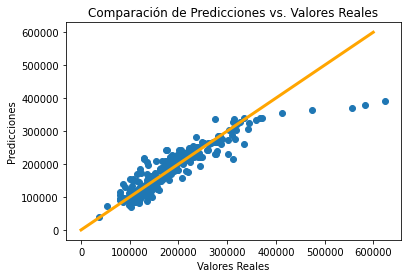

In [290]:
plt.scatter(y_test, y_preds_ridge)
plt.plot([0, 600000], [0, 600000], "orange", lw=3)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación de Predicciones vs. Valores Reales")
plt.show()

#Conclusiones y Observaciones

APLICANDO LOS ALGORITMOS DE REGRESION LINEAL,LASSO Y RIDGE SE PUEDE OBSERVAR QUE NO HAY VARIACION EN LA VARIABLE PREDICTORA SIENDO ESTA QUE EN LOS AJUSTES DE RIDGE Y LASSO SE CAMBIO LOS PARAMETROS DE ALPHA EN LOS SIGUIENTES VALORES



*   10
*   1
*   0.1
*   0.001


SIENDO QUE NO CAMBIO SIGNIFICATIVAMENTE EL RESULTADO DEL PREDICTOR O R2